# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [65]:
# Load the dataset
file_path = 'data/rumah123_yogya_unfiltered.csv'

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [67]:
# Load the dataset
file_path = 'data/rumah123_yogya_unfiltered.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 data teratas
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [68]:
# Fungsi untuk mengonversi harga ke nilai numerik
def convert_price(price):
    price = price.replace('Rp', '')
    if 'Miliar' in price:
        price = price.replace(' Miliar', '')
        subPrice = price.split(',')
        if len(subPrice) == 2:
            miliar = subPrice[0] + '000000000'
            juta = subPrice[1] + '000000'
            price = float(miliar) + float(juta)
        else:
            price = float(subPrice[0] + '000000000')
    elif 'Juta' in price:
        price = price.replace(' Juta', '') + '000000'
    return float(price)

In [69]:
# 1. Memahami Struktur Data
# - Tinjau jumlah baris dan kolom dalam dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# - Tinjau jenis data di setiap kolom
print(df.dtypes)

Jumlah baris: 2020
Jumlah kolom: 9
price                object
nav-link             object
description          object
listing-location     object
bed                 float64
bath                float64
carport             float64
surface_area         object
building_area        object
dtype: object


In [70]:
# 2. Menangani Data yang Hilang
# - Identifikasi data yang hilang
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64


              price          bed         bath      carport  surface_area  \
count  2.020000e+03  2001.000000  1999.000000  1713.000000   2019.000000   
mean   1.619575e+09     3.969015     2.941971     1.559253    185.711243   
std    2.646924e+09     3.671654     3.517671     1.283030    250.696507   
min    7.000000e+06     1.000000     1.000000     1.000000      4.000000   
25%    6.450000e+08     2.000000     1.000000     1.000000     97.000000   
50%    1.001000e+09     3.000000     2.000000     1.000000    120.000000   
75%    2.002000e+09     4.000000     3.000000     2.000000    178.000000   
max    4.200100e+10    49.000000    49.000000    15.000000   4222.000000   

       building_area  
count   2.019000e+03  
mean    1.192893e+06  
std     5.359390e+07  
min     4.000000e+00  
25%     6.000000e+01  
50%     1.000000e+02  
75%     1.650000e+02  
max     2.408150e+09  

 price               float64
nav-link             object
description          object
listing-location     o

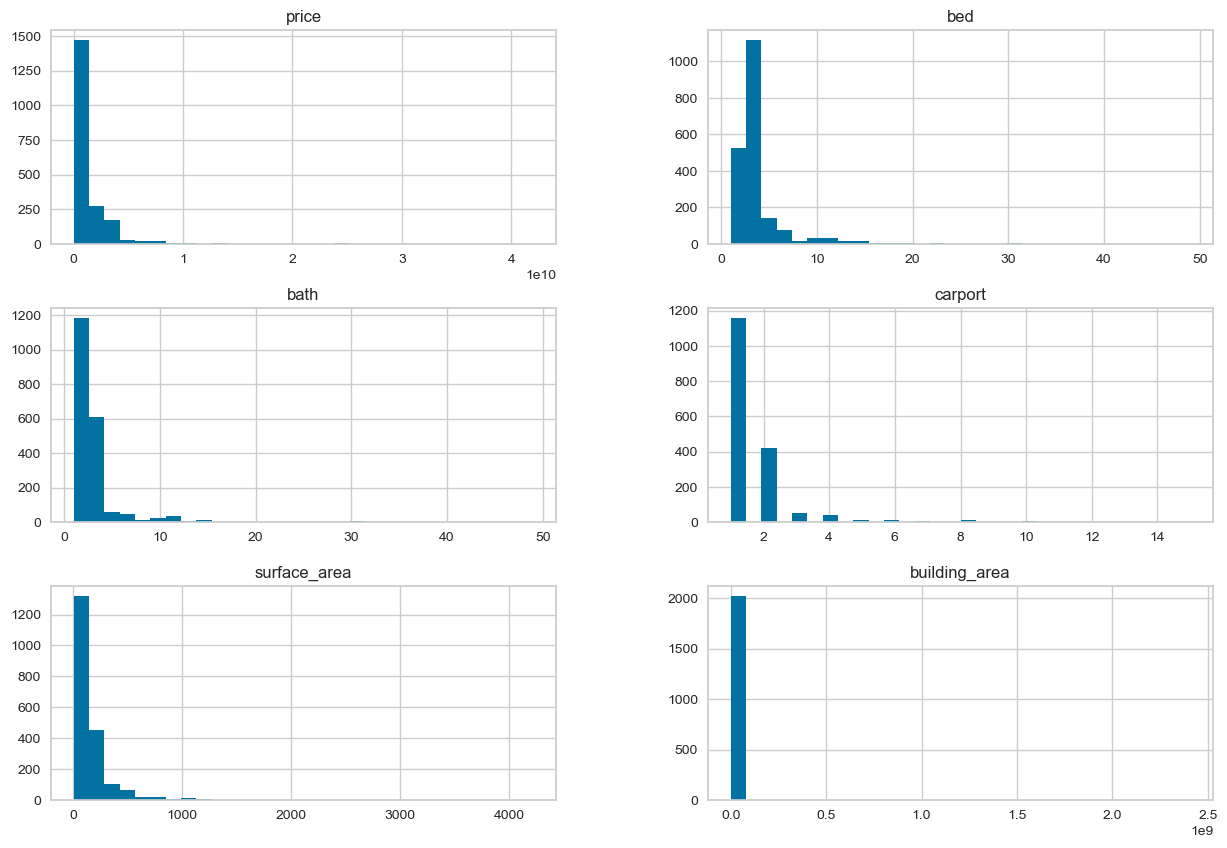

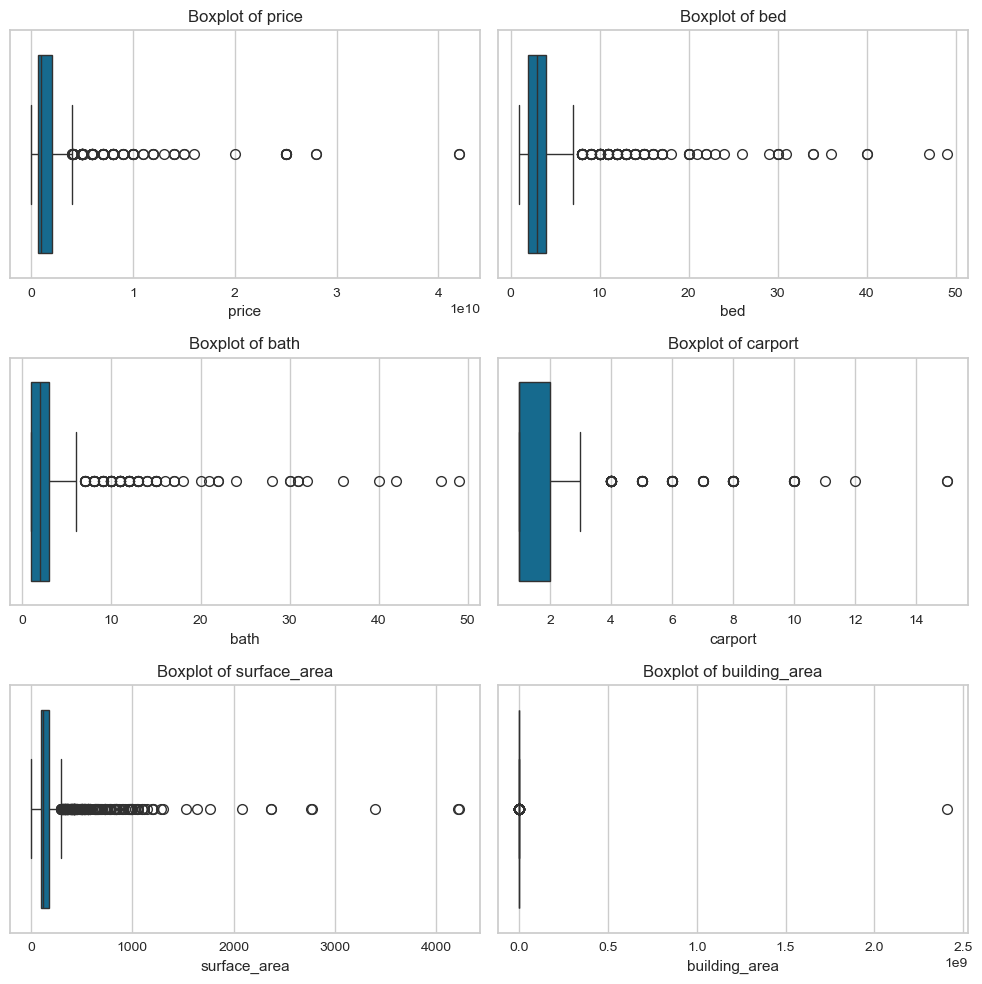

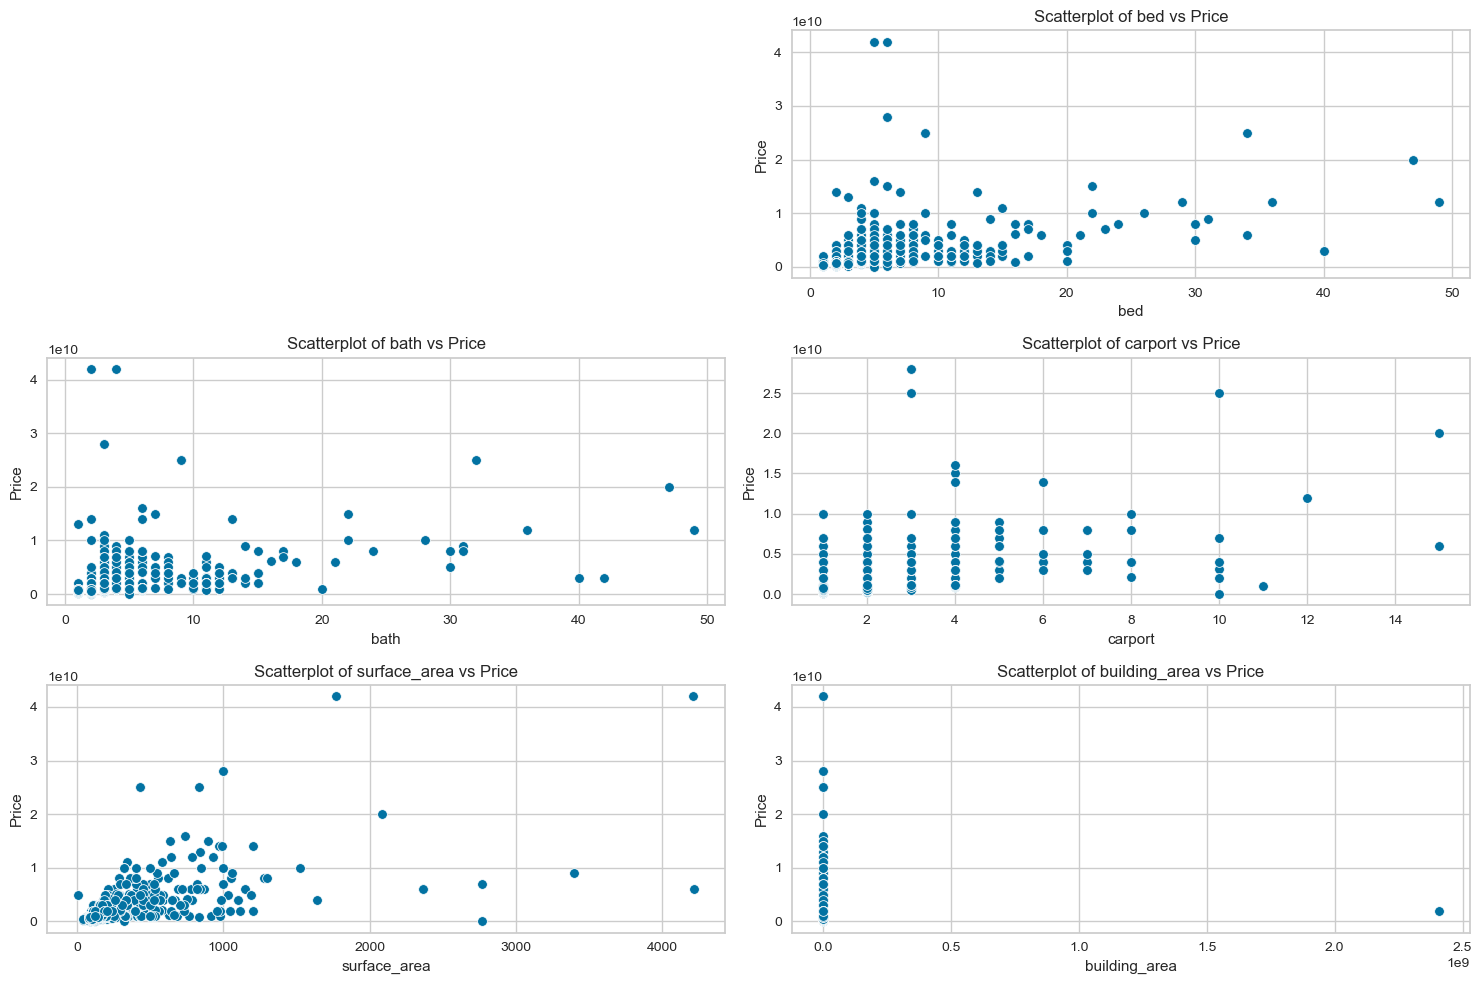

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1.079000e+09,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0
1,1.700000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0
2,6.950000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0
3,5.600000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
4,2.000000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0
5,1.047000e+09,https://www.rumah123.com/properti/sleman/hos17...,RUMAH 2 LANTAI MANGKU JALAN ASPAL DEPOK MAGUWO...,"Depok, Sleman",5.0,3.0,1.0,125.0,157.0
6,5.600000e+08,https://www.rumah123.com/properti/sleman/hos17...,Tersisa 1 Unit Rumah Murah 5 Menit Dari Candi ...,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
7,2.001000e+09,https://www.rumah123.com/properti/sleman/hos17...,Kost Putri + Rumah Induk Dekat Kampus UMY,"Gamping, Sleman",11.0,11.0,2.0,206.0,290.0
8,1.006000e+09,https://www.rumah123.com/properti/sleman/hos17...,2 Rumah dengan Tanah luas Dekat Pasar Jangkang,"Ngaglik, Sleman",5.0,4.0,2.0,300.0,200.0
9,2.004000e+09,https://www.rumah123.com/properti/yogyakarta/h...,Rumah Bonus Tanah Bangun Kos Dekat Kampus Dan ...,"Kaliurang, Yogyakarta",3.0,3.0,1.0,403.0,220.0


In [71]:
# 3. Analisis Distribusi dan Korelasi

# menghapus karakter non-numerik dan mengonversi ke tipe data numerik
df['price'] = df['price'].apply(convert_price)

# manipulasi data surface area dan building area dengan menghilangkan satuan m2 menjadi angka saja
df['surface_area'] = df['surface_area'].str.replace('m²', '').str.replace(' ', '').astype(float)
df['building_area'] = df['building_area'].str.replace('m²', '').str.replace(' ', '').astype(float)
# - Analisis distribusi variabel numerik dengan statistik deskriptif
print(df.describe())
print('\n', df.dtypes)

# visualisasi distribusi dengan histogram
df.hist(bins=30, figsize=(15, 10), grid=True)
plt.show()

# - Visualisasi distribusi variabel numerik dengan boxplot
plt.figure(figsize=(10, 10))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot((len(df.select_dtypes(include=['int64', 'float64']).columns) + 1) // 2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# - Analisis korelasi antar variabel scatter plot
# Menampilkan scatterplot untuk semua variabel numerik terhadap 'price'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    if column != 'price':
        plt.subplot((len(numeric_columns) + 1) // 2, 2, i)
        sns.scatterplot(x=column, y='price', data=df)
        plt.title(f'Scatterplot of {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
plt.tight_layout()
plt.show()

df.head(n=10)

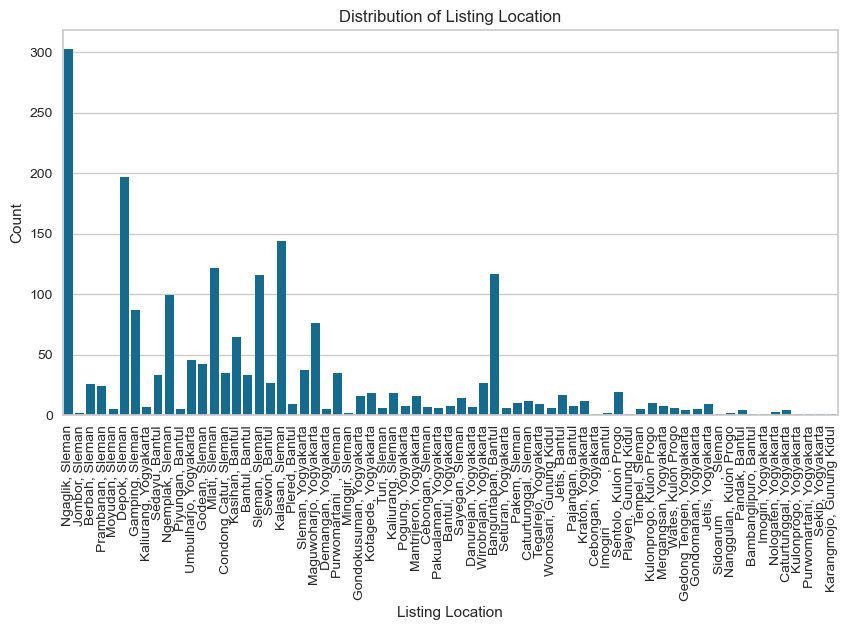

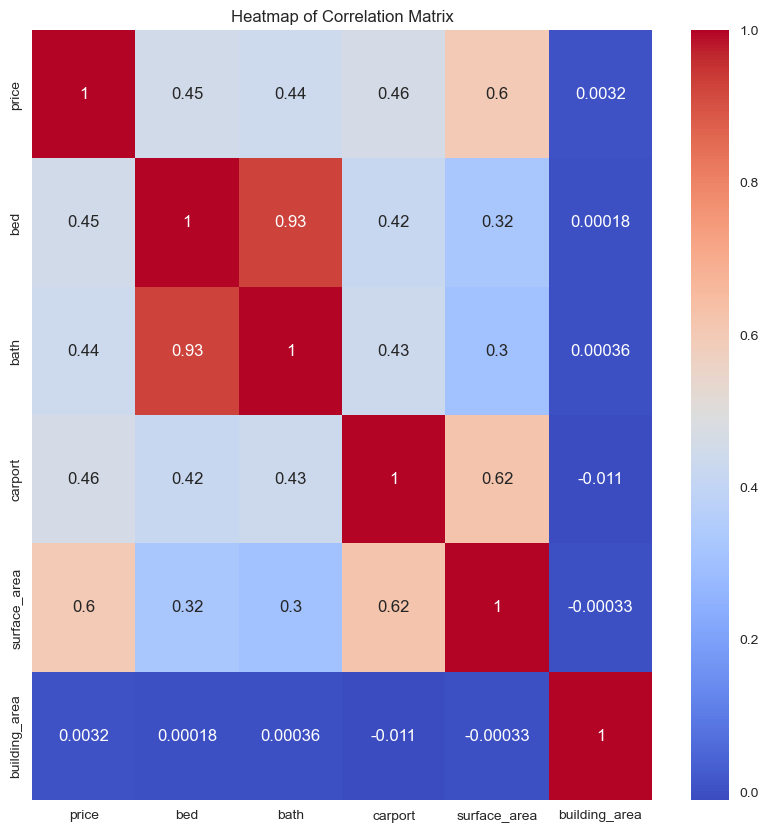

In [72]:
# 4. Visualisasi Data
# - Visualisasi grafik distribusi untuk variabel kategorikal 
plt.figure(figsize=(10, 5))
sns.countplot(x='listing-location', data=df)
plt.title('Distribution of Listing Location')
plt.xlabel('Listing Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# - Visualisasi grafik distribusi untuk variabel numerik
plt.figure(figsize=(10, 10))
numeric_data = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [73]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
df.dropna(inplace=True)
print('jumlah data kosong setelah menghapus:', df.isnull().sum().sum())

# 2. Menghapus Data Duplikat
df.drop_duplicates(inplace=True)
print('\njumlah data duplikat setelah menghapus:', df.duplicated().sum())

# 3. Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('price')  # Exclude 'price' column
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

jumlah data kosong setelah menghapus: 0

jumlah data duplikat setelah menghapus: 0


,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1.079000e+09,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",-0.241077,0.033166,0.343621,-0.226595,-0.024169
1,1.700000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",-0.241077,-0.259685,-0.436012,-0.308163,-0.024169
2,6.950000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",-0.536475,-0.259685,-0.436012,-0.317227,-0.024169
3,5.600000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",-0.241077,-0.552535,-0.436012,-0.276442,-0.024170
4,2.000000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",-0.536475,-0.552535,-0.436012,-0.498490,-0.024170


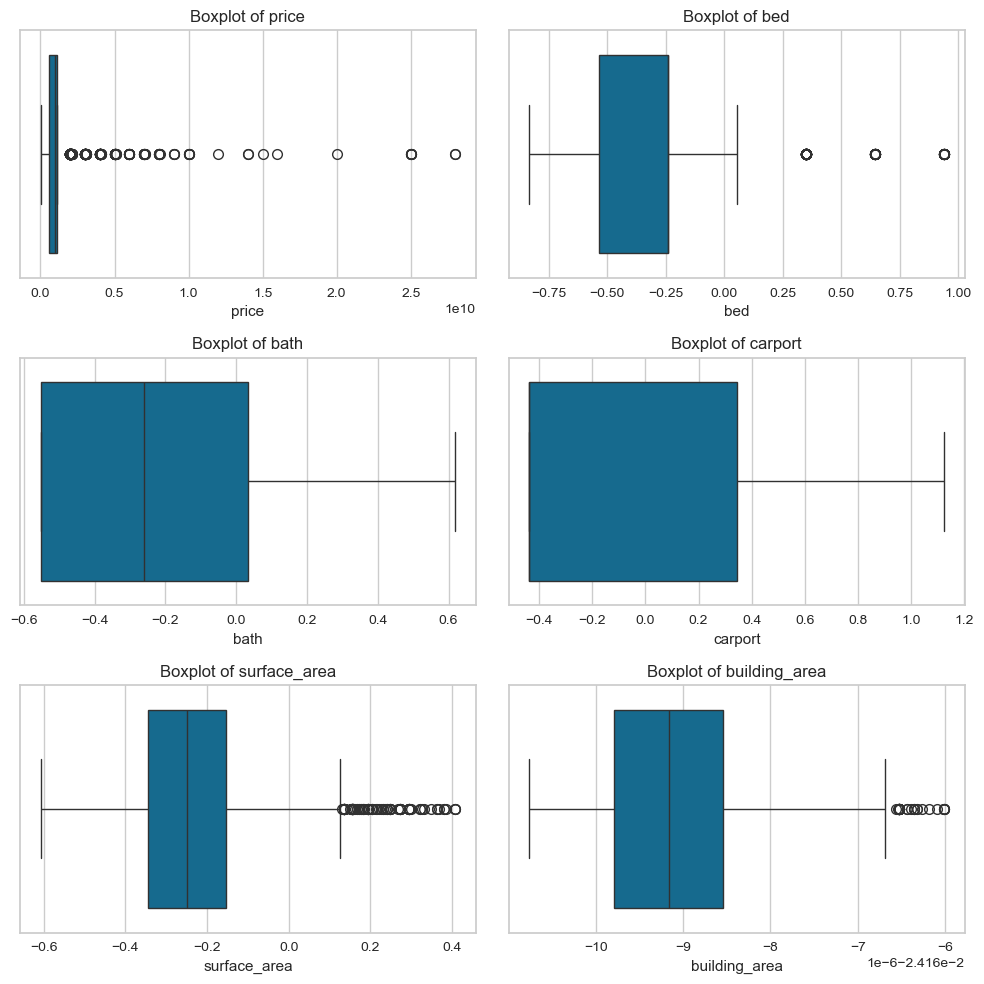

In [74]:
# 4. Deteksi dan Penanganan Outlier
# Menggunakan IQR untuk mendeteksi outlier
for column in numeric_data.columns:
    if column != 'price':  # Skip the 'price' column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[column].median()
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])


# - Visualisasi distribusi variabel numerik dengan boxplot
plt.figure(figsize=(10, 10))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot((len(df.select_dtypes(include=['int64', 'float64']).columns) + 1) // 2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [75]:
# 5. Encoding Data Kategorikal
label_encoder = LabelEncoder()
df['listing-location'] = label_encoder.fit_transform(df['listing-location'])
df.dtypes

price               float64
nav-link             object
description          object
listing-location      int64
bed                 float64
bath                float64
carport             float64
surface_area        float64
building_area       float64
dtype: object

In [76]:
# 6. Binning (Pengelompokan Data)
# Mengelompokkan harga menjadi beberapa kategori
price_bins = [0, 350000000, 700000000, 1000000000, 5000000000, np.inf]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

# Menampilkan hasil preprocessing
df.head(n=7)

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,price_category
0,1.079000e+09,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,36,-0.241077,0.033166,0.343621,-0.226595,-0.024169,High
1,1.700000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,22,-0.241077,-0.259685,-0.436012,-0.308163,-0.024169,Very Low
2,6.950000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,4,-0.536475,-0.259685,-0.436012,-0.317227,-0.024169,Low
3,5.600000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,47,-0.241077,-0.552535,-0.436012,-0.276442,-0.024170,Low
4,2.000000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,35,-0.536475,-0.552535,-0.436012,-0.498490,-0.024170,Very Low
5,1.047000e+09,https://www.rumah123.com/properti/sleman/hos17...,RUMAH 2 LANTAI MANGKU JALAN ASPAL DEPOK MAGUWO...,12,0.349717,0.033166,-0.436012,-0.203937,-0.024168,High
6,5.600000e+08,https://www.rumah123.com/properti/sleman/hos17...,Tersisa 1 Unit Rumah Murah 5 Menit Dari Candi ...,47,-0.241077,-0.552535,-0.436012,-0.276442,-0.024170,Low


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [77]:
# Pembangunan Model Clustering
## **a. Pembangunan Model Clustering**

# 1. Pilih algoritma clustering yang sesuai
# - Menggunakan algoritma KMeans untuk clustering
kmeans = KMeans(n_clusters=5, random_state=42)

# 2. Latih model dengan data menggunakan algoritma tersebut
# - Menggunakan kolom numerik yang telah diproses untuk clustering
features = df.select_dtypes(include=['int64', 'float64']).columns
kmeans.fit(df[features])

# Menambahkan hasil clustering ke dalam dataset
df['cluster'] = kmeans.labels_

# Menampilkan hasil clustering
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,price_category,cluster
0,1.079000e+09,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,36,-0.241077,0.033166,0.343621,-0.226595,-0.024169,High,0
1,1.700000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,22,-0.241077,-0.259685,-0.436012,-0.308163,-0.024169,Very Low,0
2,6.950000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,4,-0.536475,-0.259685,-0.436012,-0.317227,-0.024169,Low,0
3,5.600000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,47,-0.241077,-0.552535,-0.436012,-0.276442,-0.024170,Low,0
4,2.000000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,35,-0.536475,-0.552535,-0.436012,-0.498490,-0.024170,Very Low,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

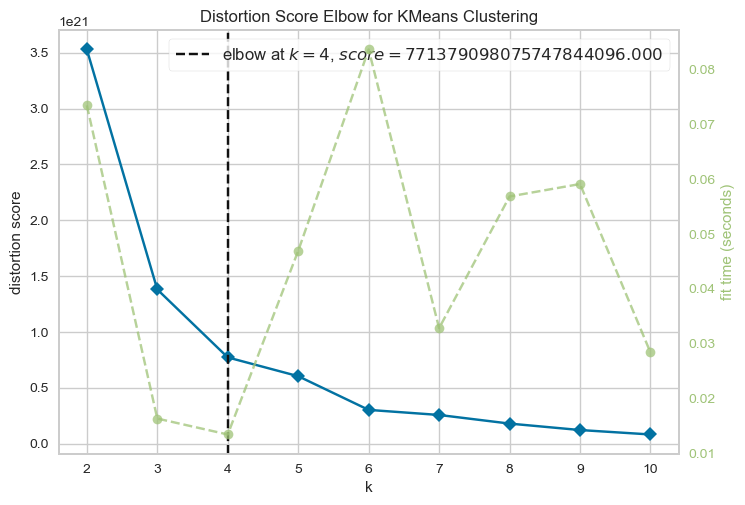

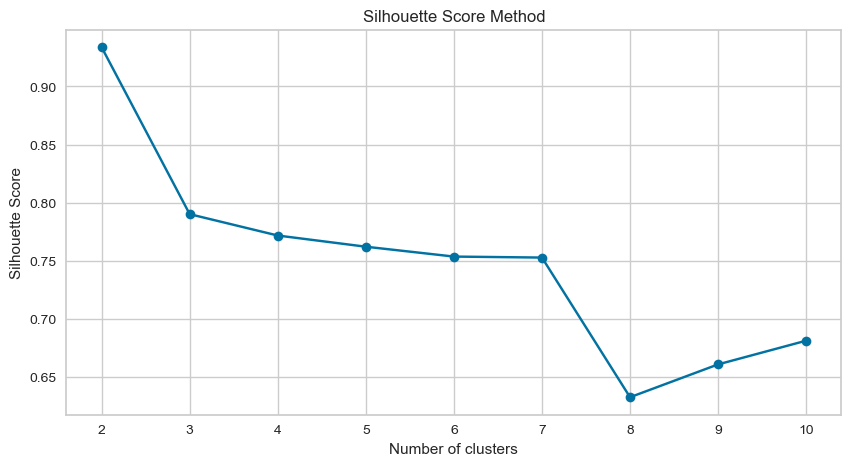

In [78]:
# Evaluasi Model Clustering
## **b. Evaluasi Model Clustering**

# Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal
# Menghitung Silhouette Score sebagai ukuran kualitas cluster

# Elbow Method
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 11))
visualizer.fit(df[features])
visualizer.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    score = silhouette_score(df[features], kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [79]:
# Menentukan jumlah cluster optimal dari visualisasi Elbow
optimal_k_elbow = visualizer.elbow_value_
print('Optimal number of clusters using Elbow Method:', optimal_k_elbow)

# Menentukan jumlah cluster optimal dari visualisasi Silhouette Score
optimal_k_silhoutte = silhouette_scores.index(max(silhouette_scores)) + 2
print('Optimal number of clusters using Silhouette Score Method:', optimal_k_silhoutte)

# Evaluasi model dengan silhouette score
# Gunakan nilai K yang optimal untuk model KMeans
kmeans = KMeans(n_clusters=optimal_k_silhoutte, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

silhouette_avg = silhouette_score(df[features], df['cluster'])
print(f"Silhouette Score: {silhouette_avg} untuk {optimal_k_silhoutte} cluster")

# SSE (Sum of Squared Errors)
sse = kmeans.inertia_
print(f'SSE: {sse}')

# Menampilkan hasil clustering
df.head()

Optimal number of clusters using Elbow Method: 4
Optimal number of clusters using Silhouette Score Method: 2
Silhouette Score: 0.9337038732993802 untuk 2 cluster
SSE: 3.5292446958430795e+21


,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,price_category,cluster
0,1.079000e+09,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,36,-0.241077,0.033166,0.343621,-0.226595,-0.024169,High,0
1,1.700000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,22,-0.241077,-0.259685,-0.436012,-0.308163,-0.024169,Very Low,0
2,6.950000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,4,-0.536475,-0.259685,-0.436012,-0.317227,-0.024169,Low,0
3,5.600000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,47,-0.241077,-0.552535,-0.436012,-0.276442,-0.024170,Low,0
4,2.000000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,35,-0.536475,-0.552535,-0.436012,-0.498490,-0.024170,Very Low,0


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

            Feature        Score
0             price  2401.781207
4           carport    18.870218
2               bed    14.358964
1  listing-location     0.987093
5      surface_area     0.225209
6     building_area     0.067365
3              bath     0.000139
Selected Features: ['price', 'carport', 'bed', 'listing-location', 'surface_area', 'building_area', 'bath']


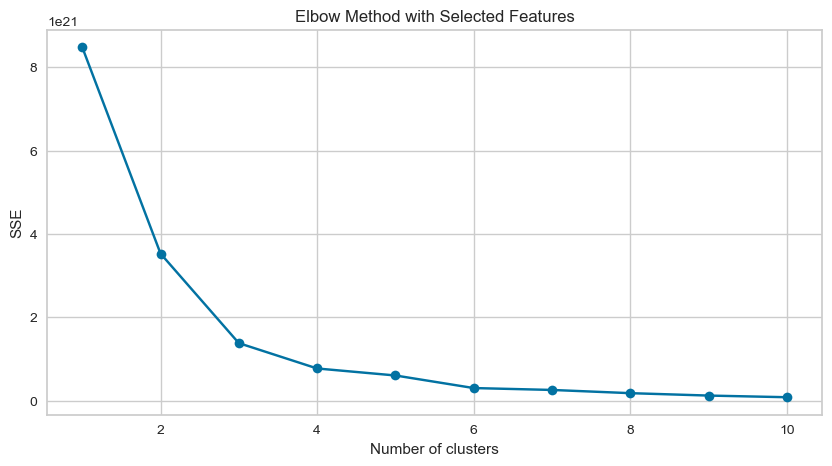

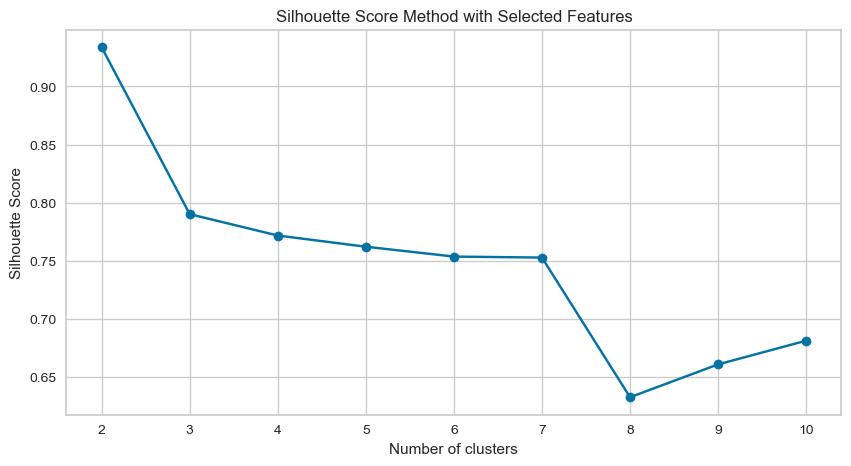

In [80]:
# Feature Selection (Opsional)
from sklearn.feature_selection import SelectKBest, f_classif

# Menghilangkan kolom tidak diperlukan
df.drop(['nav-link', 'description'], axis=1, inplace=True)

# Menggunakan SelectKBest untuk memilih fitur terbaik
X = df[features]
y = df['cluster']

# Menggunakan ANOVA F-test untuk memilih fitur terbaik
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Menampilkan skor fitur
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

# Memilih fitur terbaik berdasarkan skor
selected_features = feature_scores['Feature'].tolist()
print(f"Selected Features: {selected_features}")

# Melakukan pemodelan ulang dengan fitur yang dipilih
kmeans = KMeans(n_clusters=optimal_k_elbow, random_state=42)
kmeans.fit(df[selected_features])

# Menambahkan hasil clustering ke dalam dataset
df['cluster_selected'] = kmeans.labels_

# Menampilkan hasil clustering dengan fitur yang dipilih
df.head()

# Evaluasi ulang model clustering dengan fitur yang dipilih
# Elbow Method
sse_selected = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[selected_features])
    sse_selected.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse_selected, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method with Selected Features')
plt.show()

# Silhouette Score
silhouette_scores_selected = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[selected_features])
    score = silhouette_score(df[selected_features], kmeans.labels_)
    silhouette_scores_selected.append(score)

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_selected, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method with Selected Features')
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

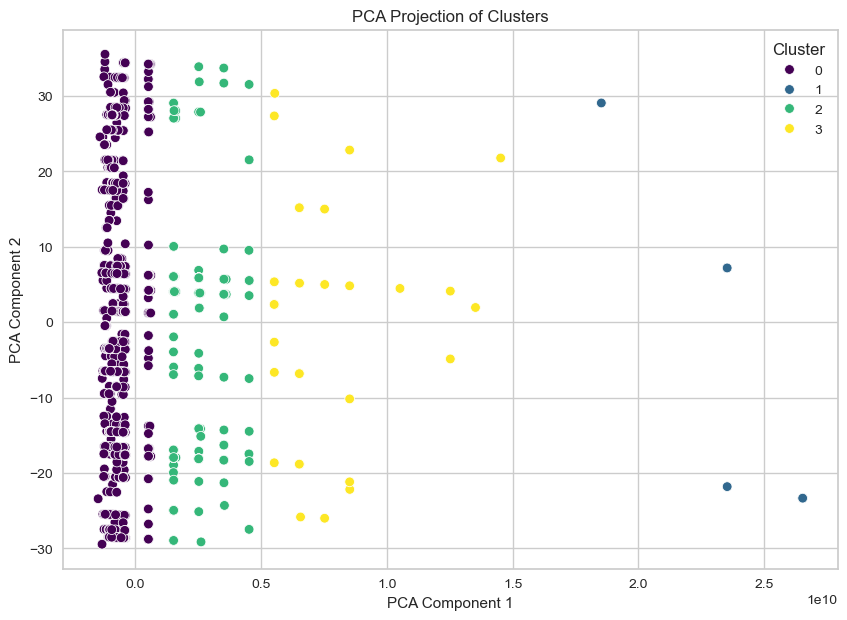

In [81]:
# Visualisasi Hasil Clustering
## **d. Visualisasi Hasil Clustering**

# Menggunakan PCA untuk mengurangi dimensi data menjadi 2D
from sklearn.decomposition import PCA

# Menggunakan fitur yang dipilih untuk visualisasi
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[selected_features])

# Menambahkan hasil PCA ke dalam dataset
df['pca1'] = pca_features[:, 0]
df['pca2'] = pca_features[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_selected', data=df, palette='viridis')
plt.title('PCA Projection of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

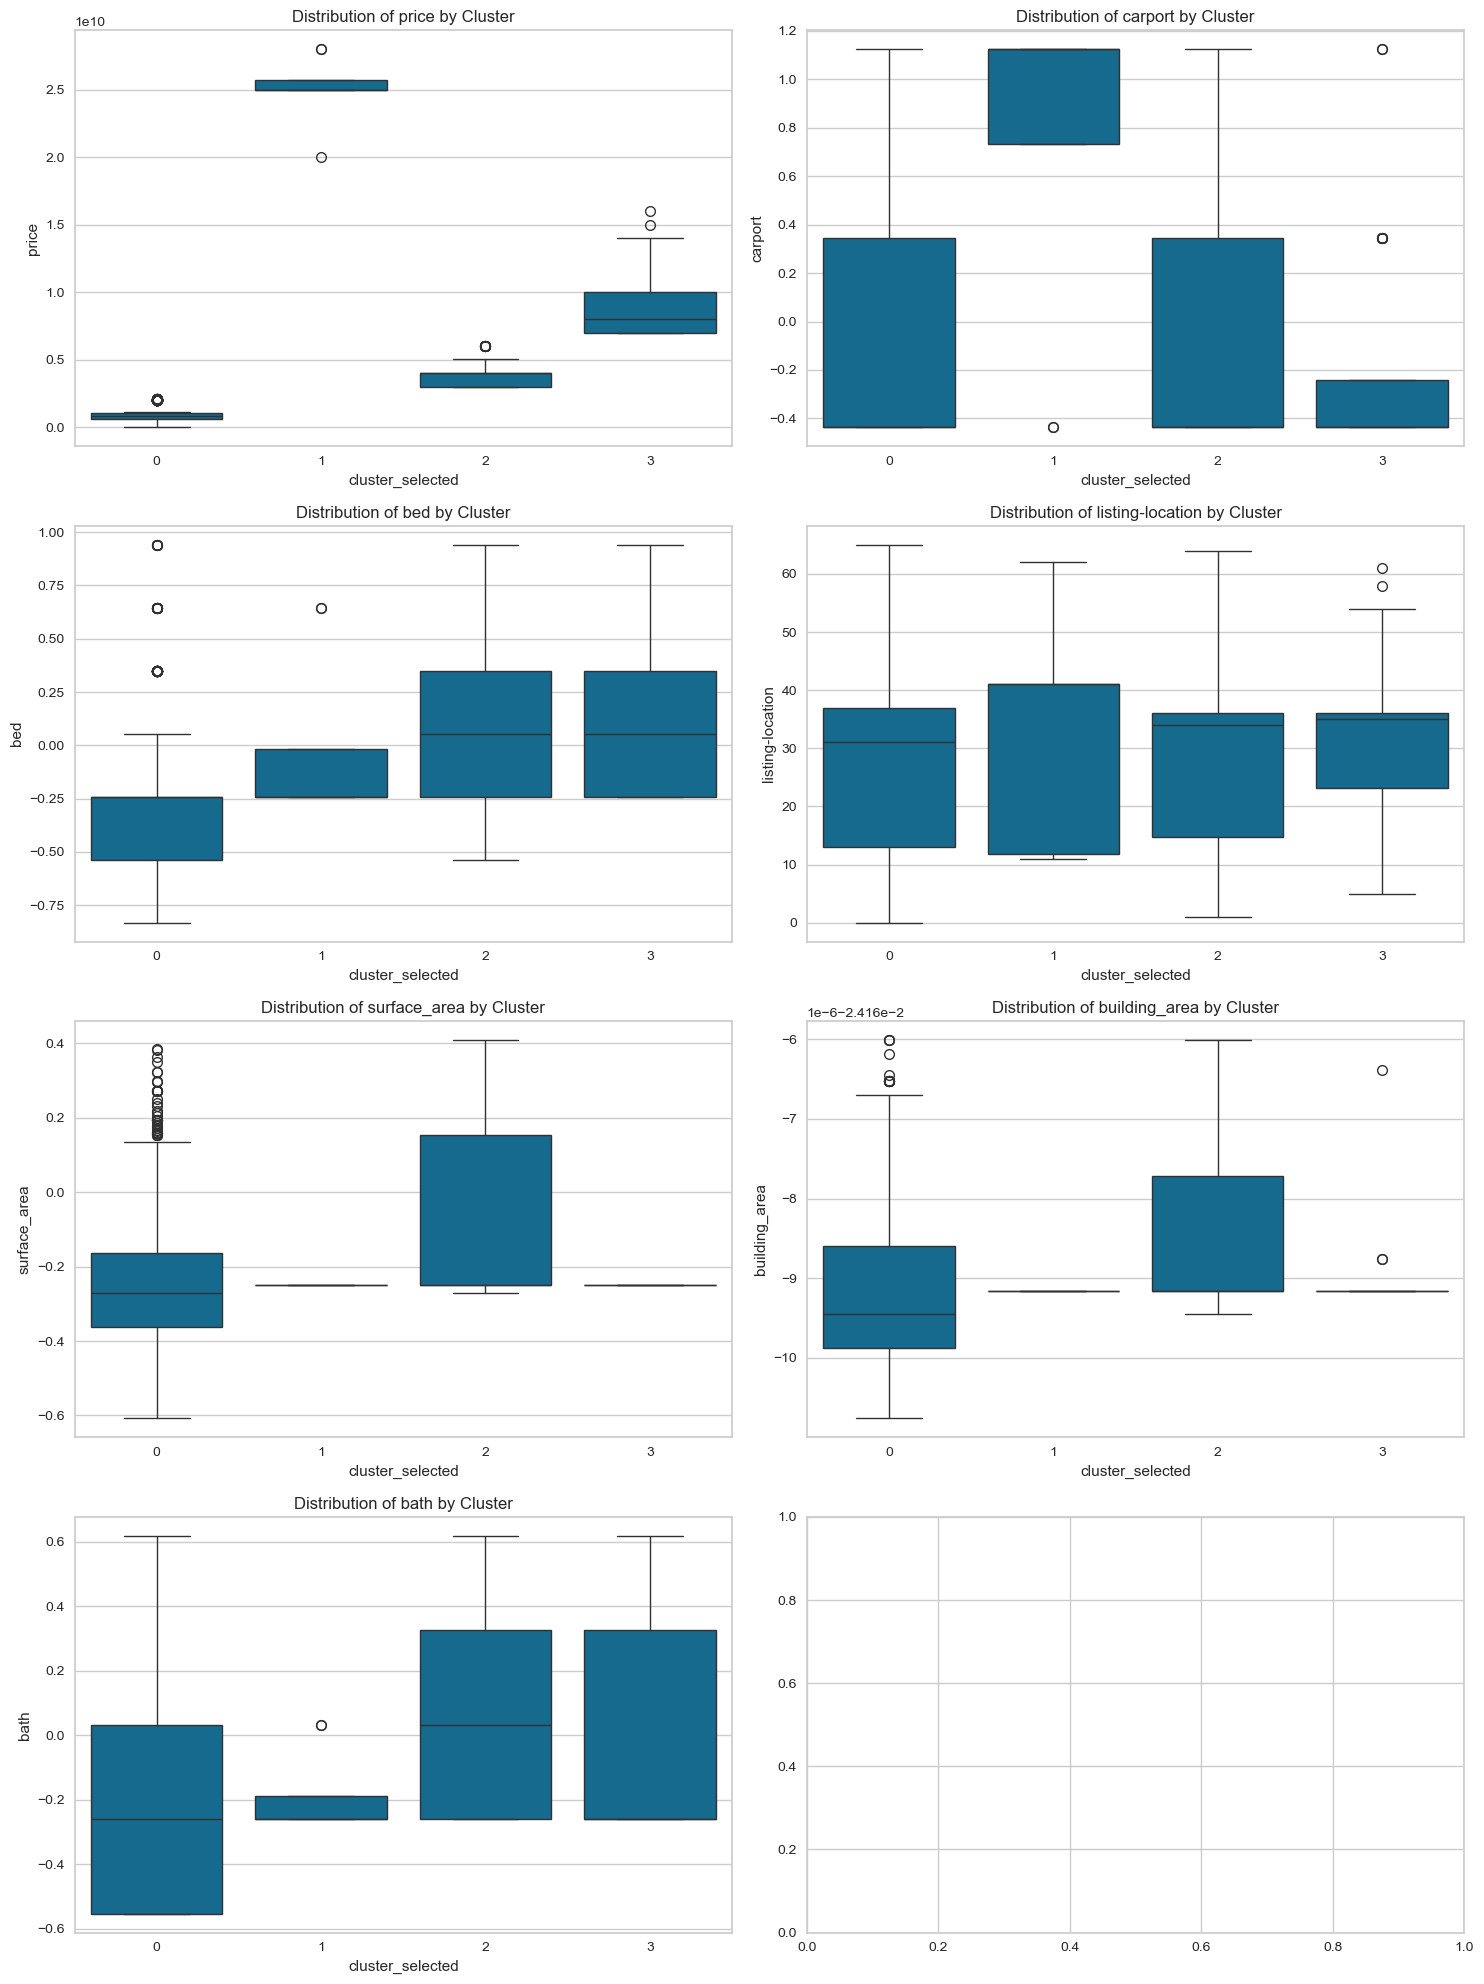

#### Cluster 0:
Cluster 0 memiliki karakteristik sebagai berikut:
- **Jumlah data**: 1505
- **Harga rata-rata**: Rp 925,192,026.58
- **Luas tanah rata-rata**: 116.55 m²
- **Luas bangunan rata-rata**: 96.22 m²
- **Jumlah kamar tidur rata-rata**: 2.97
- **Jumlah kamar mandi rata-rata**: 2.02
- **Jumlah carport rata-rata**: 1.27

#### Cluster 2:
Cluster 2 memiliki karakteristik sebagai berikut:
- **Jumlah data**: 168
- **Harga rata-rata**: Rp 3,836,857,142.86
- **Luas tanah rata-rata**: 153.38 m²
- **Luas bangunan rata-rata**: 141.60 m²
- **Jumlah kamar tidur rata-rata**: 4.05
- **Jumlah kamar mandi rata-rata**: 3.15
- **Jumlah carport rata-rata**: 1.54

#### Cluster 3:
Cluster 3 memiliki karakteristik sebagai berikut:
- **Jumlah data**: 32
- **Harga rata-rata**: Rp 9,068,750,000.00
- **Luas tanah rata-rata**: 115.00 m²
- **Luas bangunan rata-rata**: 103.47 m²
- **Jumlah kamar tidur rata-rata**: 4.09
- **Jumlah kamar mandi rata-rata**: 2.88
- **Jumlah carport rata-rata**: 1.31

#### Clust

In [82]:
# Analisis dan Interpretasi Hasil Cluster
## **e. Analisis dan Interpretasi Hasil Cluster**

# Visualisasi distribusi nilai dalam cluster
# Visualisasi distribusi nilai dalam cluster dengan grid 2 kolom
num_features = len(selected_features)
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, 5 * ((num_features + 1) // 2)))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(x='cluster_selected', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()

# Mengembalikan data ke skala aslinya
df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])

# Interpretasi setiap cluster
for cluster in df['cluster_selected'].unique():
    cluster_data = df[df['cluster_selected'] == cluster]
    print(f"#### Cluster {cluster}:")
    print(f"Cluster {cluster} memiliki karakteristik sebagai berikut:")
    print(f"- **Jumlah data**: {len(cluster_data)}")
    print(f"- **Harga rata-rata**: Rp {cluster_data['price'].mean():,.2f}")
    print(f"- **Luas tanah rata-rata**: {cluster_data['surface_area'].mean():.2f} m²")
    print(f"- **Luas bangunan rata-rata**: {cluster_data['building_area'].mean():.2f} m²")
    print(f"- **Jumlah kamar tidur rata-rata**: {cluster_data['bed'].mean():.2f}")
    print(f"- **Jumlah kamar mandi rata-rata**: {cluster_data['bath'].mean():.2f}")
    print(f"- **Jumlah carport rata-rata**: {cluster_data['carport'].mean():.2f}")
    print()

# Menskalakan data kembali ke skala aslinya
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

Tulis hasil interpretasinya di sini.

1. Cluster 0: Cluster 0 terdiri dari properti dengan harga rata-rata yang relatif rendah. Properti dalam cluster ini memiliki luas tanah dan bangunan yang sedang, serta jumlah kamar tidur dan kamar mandi yang cukup untuk keluarga kecil. Cluster ini mungkin mencakup rumah-rumah yang terjangkau di daerah perkotaan atau pinggiran kota.

2. Cluster 1: Cluster 1 terdiri dari properti dengan harga rata-rata yang sangat tinggi. Properti dalam cluster ini memiliki luas tanah dan bangunan yang sedang, serta jumlah kamar tidur dan kamar mandi yang cukup banyak. Cluster ini mungkin mencakup properti mewah atau rumah-rumah besar di lokasi yang sangat diinginkan.

3. Cluster 2: Cluster 2 terdiri dari properti dengan harga rata-rata yang cukup tinggi. Properti dalam cluster ini memiliki luas tanah dan bangunan yang besar, serta jumlah kamar tidur dan kamar mandi yang banyak. Cluster ini mungkin mencakup rumah-rumah besar yang cocok untuk keluarga besar atau properti di daerah yang lebih eksklusif.

4. Cluster 3: Cluster 3 terdiri dari properti dengan harga rata-rata yang sangat tinggi. Properti dalam cluster ini memiliki luas tanah dan bangunan yang sedang hingga besar, serta jumlah kamar tidur dan kamar mandi yang banyak. Cluster ini mungkin mencakup properti mewah atau rumah-rumah besar di lokasi yang sangat diinginkan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [83]:
# Mengeksport Data
# Simpan hasilnya ke dalam file CSV

# Menyimpan dataset yang telah diproses dan hasil clustering ke dalam file CSV
output_file_path = 'data/rumah123_yogya_clustered.csv'
df.to_csv(output_file_path, index=False)

# Menampilkan pesan konfirmasi
print(f"Dataset telah disimpan ke dalam file: {output_file_path}")

Dataset telah disimpan ke dalam file: data/rumah123_yogya_clustered.csv
